In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import librosa

In [ ]:
def SSIM(x, y):
    # assumption : x and y are grayscale images with the same dimension

    import numpy as np

    def mean(img):
        return np.mean(img)

    def sigma(img):
        return np.std(img)

    def cov(img1, img2):
        img1_ = np.array(img1[:, :], dtype=np.float64)
        img2_ = np.array(img2[:, :], dtype=np.float64)

        return np.mean(img1_ * img2_) - mean(img1) * mean(img2)

    K1 = 0.01
    K2 = 0.03
    L = 256  # when each pixel spans 0 to 255

    C1 = K1 * K1 * L * L
    C2 = K2 * K2 * L * L
    C3 = C2 / 2

    l = (2 * mean(x) * mean(y) + C1) / (mean(x) ** 2 + mean(y) ** 2 + C1)
    c = (2 * sigma(x) * sigma(y) + C2) / (sigma(x) ** 2 + sigma(y) ** 2 + C2)
    s = (cov(x, y) + C3) / (sigma(x) * sigma(y) + C3)

    return l * c * s

In [ ]:
def audio_to_mel_spectrogram(audio_path, n_fft=2048, hop_length=512, n_mels=128):
    """
    Converts an audio file to a Mel spectrogram.

    Parameters:
    - audio_path: Path to the audio file.
    - n_fft: Length of the FFT window.
    - hop_length: Number of samples between successive frames.
    - n_mels: Number of Mel bands to generate.

    Returns:
    - S_dB: Mel spectrogram in dB.
    - sr: Sampling rate.
    """
    # Load the audio file
    y, sr = librosa.load(path=audio_path)

    # Convert to Mel spectrogram using keyword arguments
    S = librosa.feature.melspectrogram(
        y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels
    )

    # Convert to dB
    S_dB = librosa.power_to_db(S, ref=np.max)

    return S_dB, sr

In [ ]:
def plot_mel_spectrogram(S_dB, sr, hop_length):
    """
    Plots a Mel spectrogram.

    Parameters:
    - S_dB: Mel spectrogram (in dB).
    - sr: Sample rate of the audio signal.
    - hop_length: Number of samples between successive frames.
    """
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(
        S_dB, sr=sr, hop_length=hop_length, x_axis="time", y_axis="mel"
    )
    plt.colorbar(format="%+2.0f dB")
    plt.title("Mel-frequency spectrogram")
    plt.tight_layout()
    plt.show()

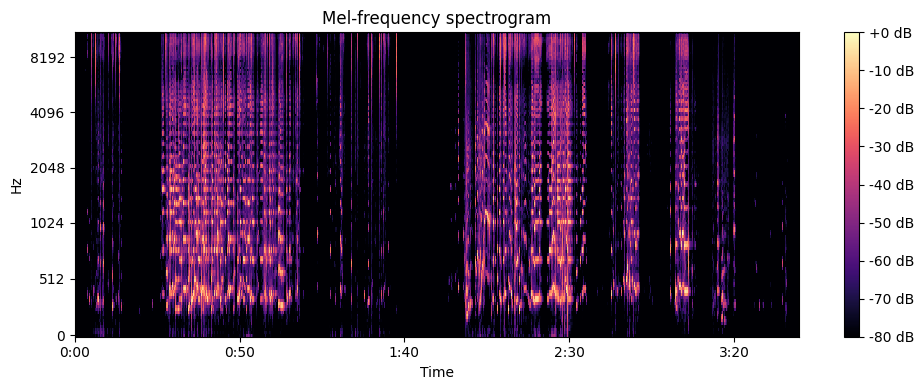

In [ ]:
# Update this path to your audio file
audio_path_orig = "/content/Melancholic_vocal.mp3"


S_dB1, sr1 = audio_to_mel_spectrogram(audio_path_orig)
plot_mel_spectrogram(S_dB1, sr1, hop_length=512)

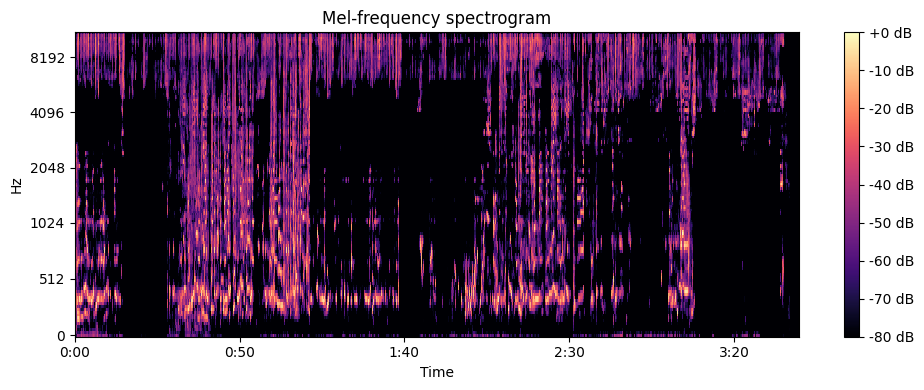

In [ ]:
audio_path_musdb = "/content/musdb_vocals.wav"

S_dB2, sr2 = audio_to_mel_spectrogram(audio_path_musdb)
plot_mel_spectrogram(S_dB2, sr2, hop_length=512)

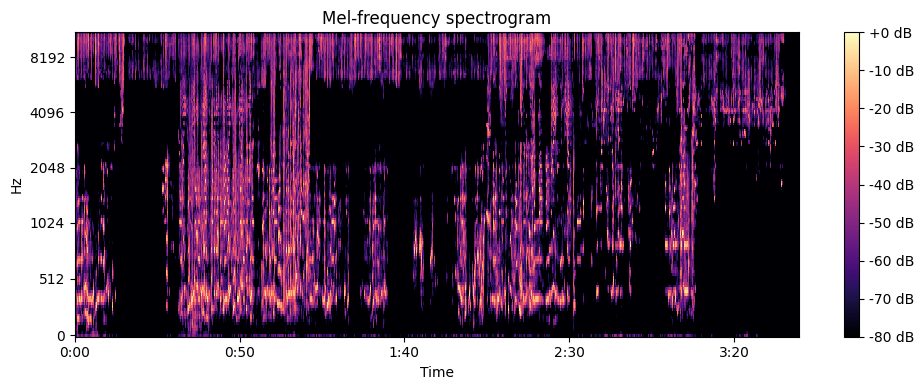

In [ ]:
audio_path_vocal = "/content/vocaloid_vocals.wav"
S_dB3, sr3 = audio_to_mel_spectrogram(audio_path_vocal)
plot_mel_spectrogram(S_dB3, sr3, hop_length=512)

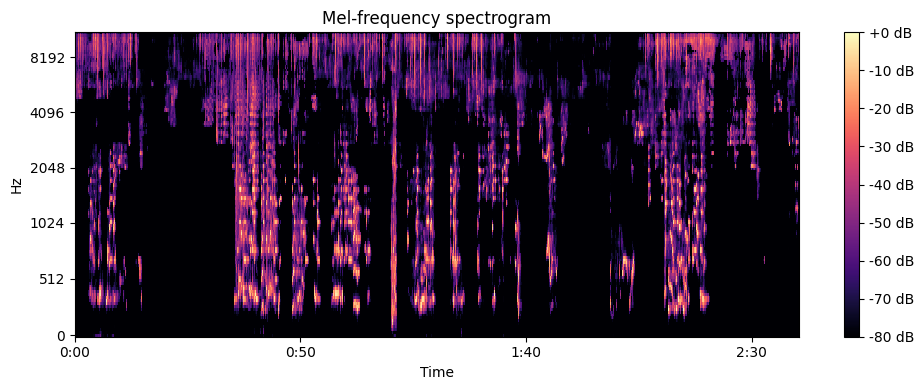

In [ ]:
audio_path_pre = "/content/vocals.wav"
S_dB4, sr4 = audio_to_mel_spectrogram(audio_path_pre)
plot_mel_spectrogram(S_dB4, sr4, hop_length=512)

In [ ]:
orig_mudb = SSIM(S_dB1, S_dB2)
orig_mudb

0.4938516941381169

In [ ]:
orig_vocal = SSIM(S_dB1, S_dB3)
orig_vocal

0.4834027348994771

In [ ]:
S_dB1_truncated = S_dB1[:, :6912]

pre = SSIM(S_dB1_truncated, S_dB4)
pre

0.4472453530872118